<a href="https://colab.research.google.com/github/mlapark/FutureMaker2021/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# This just means that if I want to refer to code in the package ‘pandas’, I’ll refer to it with the name pd.
# We then read in the CSV file by running this line of code:

df = pd.read_csv('housepricedata.csv')

from sklearn import preprocessing

# This line of code means that we will read the csv file ‘housepricedata.csv’
# (which should be in the same directory as your notebook) and store it in the variable ‘df’.
# If we want to find out what is in df, simply type df into the grey box and click Alt-Enter:

df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0



Here, you can explore the data a little. We have our input features in the first ten columns:
Number of Full Bathrooms
Number of Half Bathrooms
Number of Bedrooms above ground
Total Number of Rooms above ground
Number of Fireplaces
Garage Area (in sq ft)
In our last column, we have the feature that we would like to predict:

Is the house price above the median or not? (1 for yes and 0 for no)
Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [12]:
dataset = df.values

# To convert our dataframe into an array, we just store the values of df (by accessing df.values) into the variable ‘dataset’. To see what is inside this variable ‘dataset’, simply type ‘dataset’ into a grey box on your notebook and run the cell (Alt-Enter):

dataset

# We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y. The code to do the first assignment is this:

X = dataset[:,0:10]



This might look a bit weird, but let me explain what’s inside the square brackets. Everything before the comma refers to the rows of the array and everything after the comma refers to the columns of the arrays.

Since we’re not splitting up the rows, we put ‘:’ before the comma. This means to take all the rows in dataset and put it in X.

We want to extract out the first 10 columns, and so the ‘0:10’ after the comma means take columns 0 to 9 and put it in X (we don’t include column 10). Our columns start from index 0, so the first 10 columns are really columns 0 to 9.

We then assign the last column of our array to Y:

In [13]:
Y = dataset[:,10]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale



array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [14]:
from sklearn.model_selection import train_test_split

# split your data:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

# This tells scikit-learn that your val_and_test size will be 30% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign as the variable names suggest.
# Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)



The code above will split the val_and_test size equally to the validation set and the test set.

In summary, we now have a total of six variables for our datasets we will use:

X_train (10 input features, 70% of full dataset)
X_val (10 input features, 15% of full dataset)
X_test (10 input features, 15% of full dataset)
Y_train (1 label, 70% of full dataset)
Y_val (1 label, 15% of full dataset)
Y_test (1 label, 15% of full dataset)
If you want to see how the shapes of the arrays are for each of them (i.e. what dimensions they are), simply run

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


As you can see, the training set has 1022 data points while the validation and test set has 219 data points each. The X variables have 10 input features, while the Y variables only has one feature to predict.

And now, our data is finally ready! Phew!

Summary: In processing the data, we’ve:

Read in the CSV (comma separated values) file and convert them to arrays.
Split our dataset into the input features and the label.
Scale the data so that the input features have similar orders of magnitude.
Split our dataset into the training set, the validation set and the test set.


Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6994 - accuracy: 0.5060 - val_loss: 0.6886 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5241 - val_loss: 0.6812 - val_accuracy: 0.5753
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.6145 - val_loss: 0.6736 - val_accuracy: 0.7763
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.7613 - val_loss: 0.6667 - val_accuracy: 0.8082
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.7770 - val_loss: 0.6603 - val_accuracy: 0.7991
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7663 - val_loss: 0.6538 - val_accuracy: 0.7945
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7700 - val_loss: 0.6466 - val_accuracy: 0.7991
Epoch 8/100


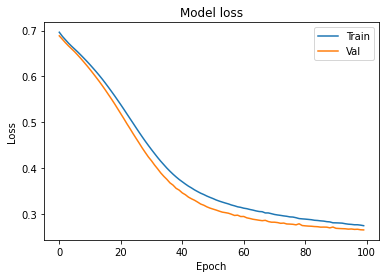

KeyError: ignored

In [17]:
# First, let’s import the necessary code from Keras:

from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Then, we specify that in our Keras sequential model like this:

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# Configuring the model with these settings requires us to call the function model.compile, like this:

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training on the data is pretty straightforward and requires us to write one line of code:

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

model.evaluate(X_test, Y_test)[1]

# Then, we want to visualize the training loss and the validation loss. To do so, run this snippet of code:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()



Adding Regularization to our Neural Network
For the sake of introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set. We’ll call this Model 2.

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()



